In [ ]:
maxleimport matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models,callbacks

In [ ]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
len(train_images)

60000

In [ ]:
len(test_images)

10000

In [ ]:
#normalizing
train_images=train_images.astype('float32')/255
test_images=test_images.astype('float32')/255

In [ ]:
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

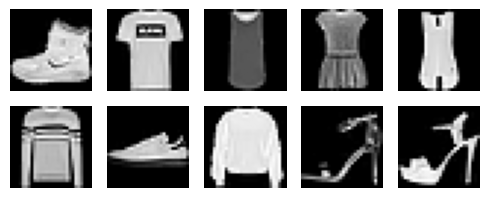

In [ ]:
plt.figure(figsize=(5,5))
for i in range(10):
  plt.subplot(5,5,i+1)
  img=train_images[i].reshape(28,28)
  plt.imshow(img,cmap='grey')
  plt.axis('off')
plt.tight_layout()

In [ ]:
#channel reshaping
train_images=train_images.reshape(-1,28,28,1)
test_images=test_images.reshape(-1,28,28,1)

In [ ]:
train_images

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [ ]:
#one hot encoding
train_labels=tf.keras.utils.to_categorical(train_labels)
test_labels=tf.keras.utils.to_categorical(test_labels)

In [ ]:
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
def create_model():
  model=models.Sequential([
      layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(64,(3,3),activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(64,(3,3),activation='relu'),
      layers.BatchNormalization(),

      layers.Flatten(),

      layers.Dense(128,activation='relu'),
      layers.Dense(64,activation='relu'),
      layers.Dropout(0.3),
      layers.Dense(10,activation='softmax')

      ])
  return model

In [ ]:
model=create_model()

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'],)

In [ ]:
#call backs
early_stopping=callbacks.EarlyStopping(patience=3,restore_best_weights=True)
reducelr=callbacks.ReduceLROnPlateau(factor=0.2,patience=3)

In [ ]:
history=model.fit(train_images,train_labels,epochs=32,validation_split=0.2,callbacks=[early_stopping,reducelr])

Epoch 1/32
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - accuracy: 0.7722 - loss: 0.6477 - val_accuracy: 0.8776 - val_loss: 0.3424 - learning_rate: 0.0010
Epoch 2/32
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.8856 - loss: 0.3243 - val_accuracy: 0.8874 - val_loss: 0.3072 - learning_rate: 0.0010
Epoch 3/32
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.8995 - loss: 0.2786 - val_accuracy: 0.8992 - val_loss: 0.2751 - learning_rate: 0.0010
Epoch 4/32
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.9089 - loss: 0.2511 - val_accuracy: 0.8662 - val_loss: 0.3469 - learning_rate: 0.0010
Epoch 5/32
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 71s 47ms/step - accuracy: 0.9214 - loss: 0.2194 - val_accuracy: 0.8977 - val_loss: 0.3036 - learning_rate: 0.0010
Epoch 6/32
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - accuracy: 0.9237 - loss: 0.2032 - val_accuracy: 0.8925 - val_loss: 0.3015 - learning_rate: 0.0010


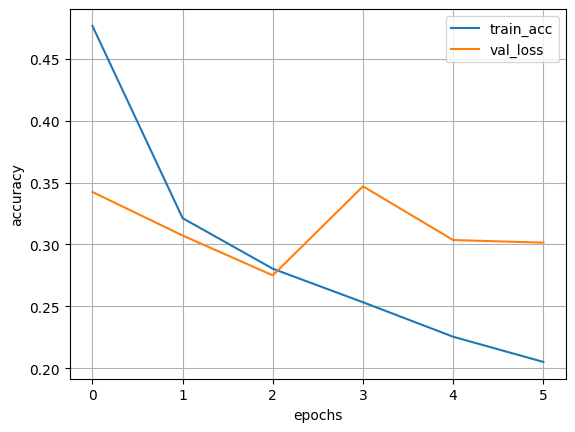

In [ ]:
plt.plot(history.history['loss'],label='train_acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.legend()

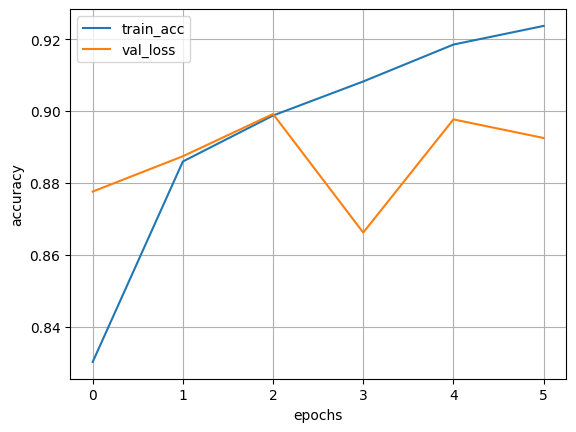

In [ ]:
plt.plot(history.history['accuracy'],label='train_acc')
plt.plot(history.history['val_accuracy'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.legend()

In [ ]:
model.save('fashion_mnist_model.keras')

In [ ]:
from PIL import ImageOps,Image

In [ ]:
def predicted_image(image_path,model):
  img=Image.open(image_path).convert('L')
  img=ImageOps.invert(img)
  img=img.resize((28,28))
  img_array=np.array(img)
  img_array=img_array.astype('float32')/255
  img_array=img_array.reshape(1,28,28,1) # Reshape to include batch size and channel

  class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


  prediction=model.predict(img_array)
  print(prediction)
  predicted_class=np.argmax(prediction)
  pred_label = class_names[predicted_class]
  print(predicted_class) # Corrected variable name
  confidence=np.max(prediction)
  print(confidence)
  return pred_label,confidence # Return predicted_class instead of predicted_image

In [ ]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


In [ ]:
def load_and_predict(image_path):
  load_model=tf.keras.models.load_model('fashion_mnist_model.keras')
  pred_label,confidence=predicted_image(image_path,load_model) # Correctly calling the global function


  img=Image.open(image_path).convert('L')
  plt.imshow(img,cmap='grey')
  plt.title(f"Predicted : {pred_label} (Confidence : {confidence})")
  plt.axis('off')

In [ ]:
from google.colab import files
files.upload()

Saving jeans.jpg to jeans (2).jpg


{'jeans (2).jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x02\x02\x02\x03\x02\x02\x02\x03\x03\x03\x03\x04\x06\x04\x04\x04\x04\x04\x08\x06\x06\x05\x06\t\x08\n\n\t\x08\t\t\n\x0c\x0f\x0c\n\x0b\x0e\x0b\t\t\r\x11\r\x0e\x0f\x10\x10\x11\x10\n\x0c\x12\x13\x12\x10\x13\x0f\x10\x10\x10\xff\xdb\x00C\x01\x03\x03\x03\x04\x03\x04\x08\x04\x04\x08\x10\x0b\t\x0b\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\xff\xc0\x00\x11\x08\x00\xe1\x00\xe1\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
[[3.5518743e-02 6.2757343e-01 8.9538908e-03 1.1166655e-01 1.0648498e-01
  4.4843956e-04 8.2609214e-02 1.4273680e-04 2.6574057e-02 2.7970009e-05]]
1
0.62757343


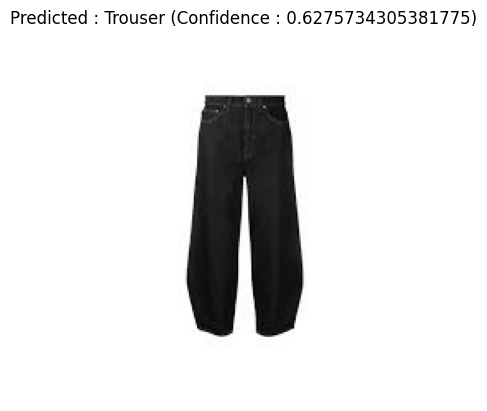

In [ ]:
load_and_predict('/content/jeans (2).jpg')